In [1]:
## Set-up.
### Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../dataset/'

In [3]:
data = pd.read_parquet(os.path.join(DATA_PATH,'data_eng.gzip'))

In [4]:
data

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,household_summary,vet_benefit,tax_status,citizenship,income_above_limit,investments
0,63+,Female,highschool,NA,Widowed,White,No,Unemployed,0,0_10,weeks_worked_48_52,Not in universe or children,NA,Householder,2,Head of household,Native,0,True
1,63+,Female,highschool,NA,Widowed,White,No,Children or Armed Forces,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Single,Native,0,False
2,18_24,Male,no_highschool,Federal government,Never married,Black,No,Children or Armed Forces,0,101_500,weeks_worked_1_25,Hospital services,Adm support including clerical,Child 18 or older,2,Single,Native,0,False
4,63+,Male,highschool,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both 65+,Native,0,False
5,33_45,Male,bachelors,Private,Married-civilian spouse present,Asian or Pacific Islander,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Retail trade,Other service,Householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209492,33_45,Female,no_highschool,NA,Married-civilian spouse present,White,Yes,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
209493,25_32,Male,assc_voc,State government,Never married,White,No,Full-time schedules,0,0_10,weeks_worked_26_47,Public administration,Other service,Child 18 or older,2,Single,Native,0,True
209495,63+,Male,bachelors,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Joint both 65+,Native,0,True
209497,25_32,Female,somecollege,Private,Married-civilian spouse present,White,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Wholesale trade,Handlers equip cleaners etc,Spouse of householder,2,Joint both under 65,Native,0,False


In [5]:
dt = data.sample(frac=.1, random_state=12345)

In [6]:
import gower

In [7]:
Y = dt.income_above_limit
X = dt.drop(['income_above_limit'],axis=1)

dist_matrix = gower.gower_matrix(X)

In [8]:
#np.save(os.path.join(DATA_PATH,'gower10.npy'), dist_matrix)
#dt.to_parquet(os.path.join(DATA_PATH,'sample_gower.gzip'))

In [9]:
dist_matrix=np.load(os.path.join(DATA_PATH,'gower10.npy'))
dt = pd.read_parquet(os.path.join(DATA_PATH,'sample_gower.gzip'))
Y = dt.income_above_limit

In [10]:
col = Y.map(lambda x: 'red' if x==1 else 'blue' )
#col

In [11]:
from sklearn.manifold import TSNE
model=TSNE(learning_rate=150, perplexity=30, metric='precomputed', init='random')
Tsne_transformed=model.fit_transform(dist_matrix)

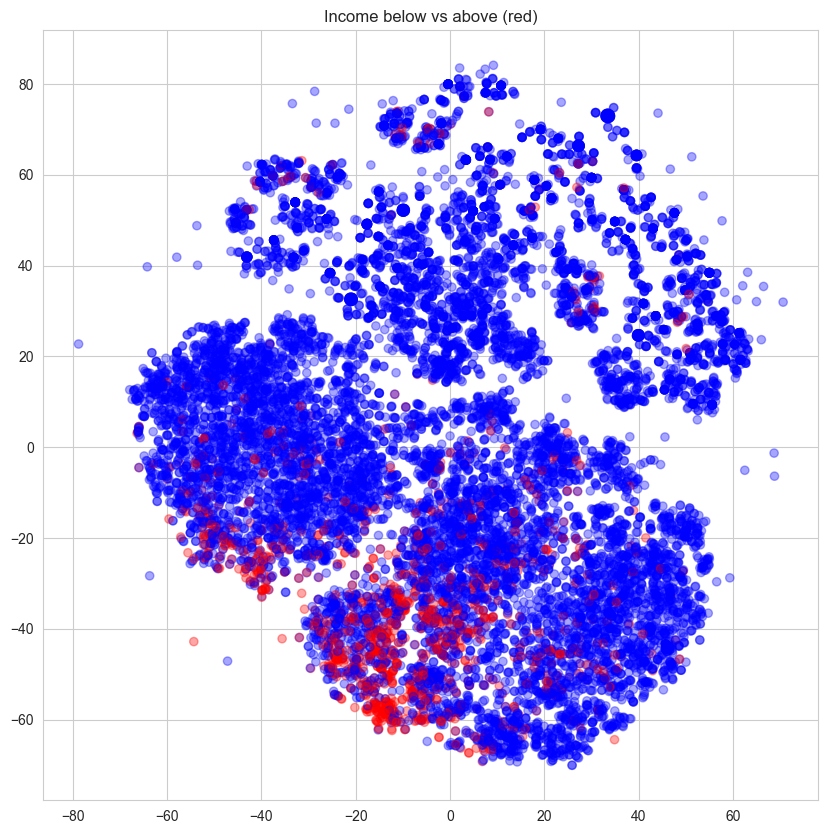

In [12]:
plt.figure(figsize=(10,10))
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys, c=col, alpha=.35)
plt.title('Income below vs above (red)')
plt.show()

In [13]:
col_g = dt.gender.map(lambda x: 'red' if x.strip()=='Male' else 'blue' )
#col_g

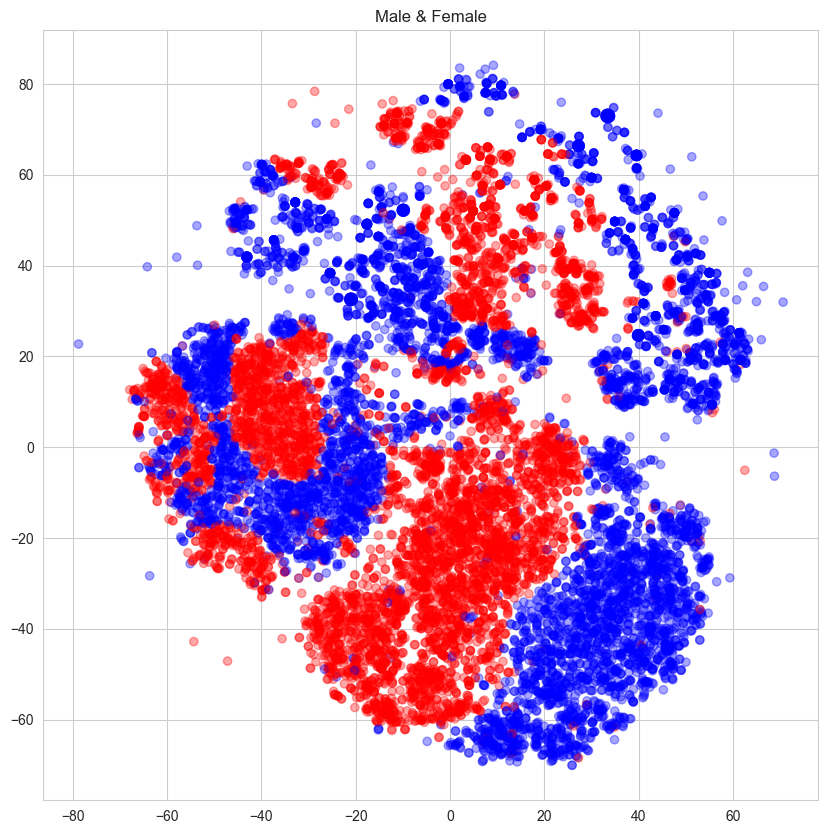

In [14]:
plt.figure(figsize=(10,10))
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys, c=col_g, alpha=.35)
plt.title('Male & Female')
plt.show()

In [15]:
col_i = dt.investments.map(lambda x: 'red' if x else 'blue' )
#col_i

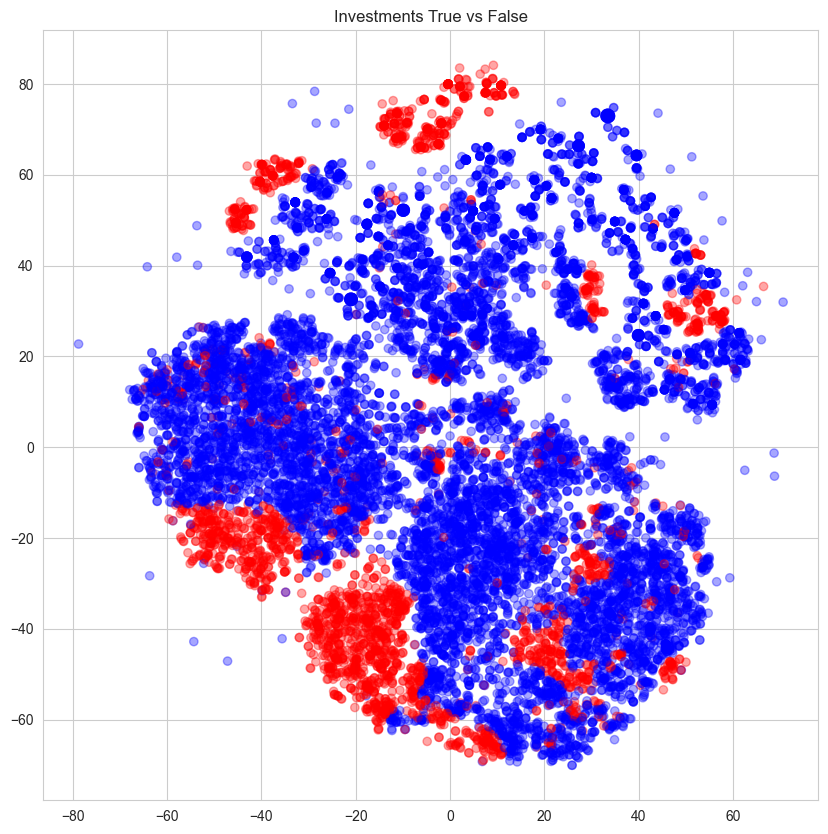

In [16]:
plt.figure(figsize=(10,10))
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys, c=col_i, alpha=.35)
plt.title('Investments True vs False')
plt.show()